LSTM model can also be used for Time Series Prediction. In this code, LSTM model is developed for UniVariate Time Series Forecasting. Basically LSTM function learns a sequence based on the past observations. Basically we will feed in the sequence of time series data with which LSTM learn the sequence to get the nth value.  For example, if sequence has a series of numbers. We will split the sequence into regular index, say for example, if we choose 6 ( for 6 months cycle ), every 6th value will be the label for the sequence of 6 numbers. 

Sales = (1000,2000,3000,4000,5000,6000,7000,8000,9000,10000)

Input and label will be done like this: 

Input                                 Label
1000,2000,3000,4000,5000,6000         7000
2000,3000,4000,5000,6000,7000         8000
3000,4000,5000,6000,7000,8000         9000


This will go on till the end of the input file.  This is how LSTM model will recognise the sequence and predict the output. 

LSTM is called Long Short Term Memory which comprises of memory blocks with various GATES that will have different state.  There will be Forget Gate, Input Gate and Output Gate.  Forget Gate decides which data to leave the block and rest of the information will be saved for further state. Input Gate will decide to send the input to the block. Output Gate will decide what output based on Input. 

In this code, we will do LSTM using Regression Method. There is another method called Window Method which will be done later. 



In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection as skl
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')



This function will read and get the data time series format ready. 

In [142]:
class read_data:
    
      def __init__(self):
            pass
                   
       
      def read_input(self):
                
                path = 'monthly-car-sales.csv'            
                df = pd.read_csv(path, header=0)
                df.index = df['Month']
                df.drop('Unnamed: 0',axis =1 , inplace=True)
                df_new = df.copy()
                df_new['Month'] = pd.to_datetime(df_new['Month'])
                df_new.reset_index(drop=True, inplace=True)
                df_new = df_new.set_index('Month')
                df.plot()
                plt.show()
                return df_new
      

This Function is will split and form the sequence and label based on the chosen order. 

In [269]:
class data_process: 
    
      def __init__(self,input):
            self.input = input
                   
    
      def scale_transform(self,input,look_back):
            
         
            def create_dataset(n_X, look_back):
                dataX, dataY = [], []
                for i in range(len(n_X)-look_back):
                    a = n_X[i:(i+look_back), ]
                    dataX.append(a)
                    dataY.append(n_X[i + look_back, ])
                return np.array(dataX), np.array(dataY)
            
            input = input.astype(float)
            scaler = MinMaxScaler(feature_range=(0,1))
            input_data = scaler.fit_transform(input)
            train_X,train_y = create_dataset(input_data,look_back)
            return train_X, train_y, scaler
            

      
      def reshape_data(self,data):
            
            return(np.reshape(data,(data.shape[0],1,data.shape[1])))
            

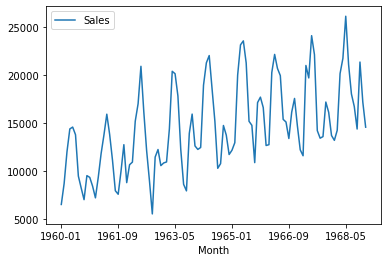

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587
...           ...
1968-08-01  16722
1968-09-01  14385
1968-10-01  21342
1968-11-01  17180
1968-12-01  14577

[108 rows x 1 columns]


In [276]:
initial_process = read_data()

df_new = initial_process.read_input()

print(df_new)

pre_process = data_process(df_new.values)

trainX,train_y,scaler = pre_process.scale_transform(df_new.values,look_back=12)



In [277]:
#trainX = np.reshape(train_X,(train_X.shape[0],1,train_X.shape[1]))

trainX = pre_process.reshape_data(trainX)
#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))


Deep learning model which comprises of two LSTM layers and one Dense layer. I haven't chosen Dropout here as there are few cycles in the input and every data is important in the time series prediction. 

In [278]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(256, return_sequences = True))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(3))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, train_y, epochs = 300, batch_size = 10, verbose = 2, shuffle = False)
model.save_weights('LSTMBasic1.h5')
predict_data = model.predict(trainX)
predict = scaler.inverse_transform(predict_data)
output = scaler.inverse_transform(train_y)

Epoch 1/300
10/10 - 0s - loss: 0.1906
Epoch 2/300
10/10 - 0s - loss: 0.0529
Epoch 3/300
10/10 - 0s - loss: 0.0446
Epoch 4/300
10/10 - 0s - loss: 0.0340
Epoch 5/300
10/10 - 0s - loss: 0.0257
Epoch 6/300
10/10 - 0s - loss: 0.0225
Epoch 7/300
10/10 - 0s - loss: 0.0187
Epoch 8/300
10/10 - 0s - loss: 0.0148
Epoch 9/300
10/10 - 0s - loss: 0.0114
Epoch 10/300
10/10 - 0s - loss: 0.0089
Epoch 11/300
10/10 - 0s - loss: 0.0075
Epoch 12/300
10/10 - 0s - loss: 0.0071
Epoch 13/300
10/10 - 0s - loss: 0.0069
Epoch 14/300
10/10 - 0s - loss: 0.0068
Epoch 15/300
10/10 - 0s - loss: 0.0067
Epoch 16/300
10/10 - 0s - loss: 0.0067
Epoch 17/300
10/10 - 0s - loss: 0.0066
Epoch 18/300
10/10 - 0s - loss: 0.0066
Epoch 19/300
10/10 - 0s - loss: 0.0065
Epoch 20/300
10/10 - 0s - loss: 0.0065
Epoch 21/300
10/10 - 0s - loss: 0.0065
Epoch 22/300
10/10 - 0s - loss: 0.0065
Epoch 23/300
10/10 - 0s - loss: 0.0064
Epoch 24/300
10/10 - 0s - loss: 0.0064
Epoch 25/300
10/10 - 0s - loss: 0.0064
Epoch 26/300
10/10 - 0s - loss: 0.

Epoch 209/300
10/10 - 0s - loss: 0.0050
Epoch 210/300
10/10 - 0s - loss: 0.0050
Epoch 211/300
10/10 - 0s - loss: 0.0050
Epoch 212/300
10/10 - 0s - loss: 0.0050
Epoch 213/300
10/10 - 0s - loss: 0.0050
Epoch 214/300
10/10 - 0s - loss: 0.0050
Epoch 215/300
10/10 - 0s - loss: 0.0050
Epoch 216/300
10/10 - 0s - loss: 0.0050
Epoch 217/300
10/10 - 0s - loss: 0.0050
Epoch 218/300
10/10 - 0s - loss: 0.0050
Epoch 219/300
10/10 - 0s - loss: 0.0050
Epoch 220/300
10/10 - 0s - loss: 0.0050
Epoch 221/300
10/10 - 0s - loss: 0.0050
Epoch 222/300
10/10 - 0s - loss: 0.0050
Epoch 223/300
10/10 - 0s - loss: 0.0050
Epoch 224/300
10/10 - 0s - loss: 0.0050
Epoch 225/300
10/10 - 0s - loss: 0.0050
Epoch 226/300
10/10 - 0s - loss: 0.0050
Epoch 227/300
10/10 - 0s - loss: 0.0050
Epoch 228/300
10/10 - 0s - loss: 0.0050
Epoch 229/300
10/10 - 0s - loss: 0.0050
Epoch 230/300
10/10 - 0s - loss: 0.0050
Epoch 231/300
10/10 - 0s - loss: 0.0050
Epoch 232/300
10/10 - 0s - loss: 0.0050
Epoch 233/300
10/10 - 0s - loss: 0.0050


Finding root mean square error between actual and predicted data. 

In [275]:
rmse = np.sqrt(mean_squared_error(output,predict[:,0]))
print(rmse)

1524.0642913651363


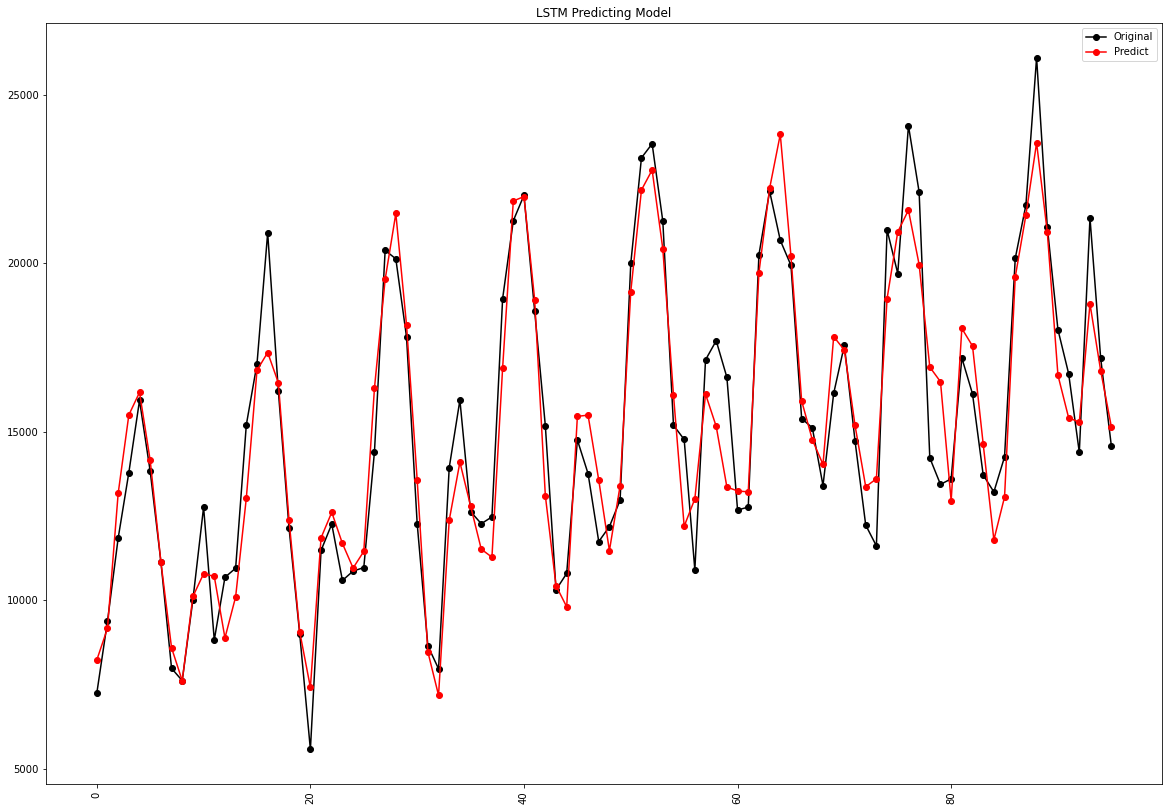

In [254]:

plt.figure(figsize=(20, 14))

x, = plt.plot(output, marker='o', color='black')

z, = plt.plot(predict[:,0],marker='o',color='red')

plt.xticks(rotation = 'vertical')

plt.legend([x,z],['Original','Predict'])

plt.title("LSTM Predicting Model")

plt.show()

To get the forecasting data, last predicted output will be appended to the input and then predict one by one upto when the forecasting is required.  Below I have chosen 12 as my forecasting length. 

In [264]:
forecast_data = df_new

def forecast_the_data(predict,forecast_data,length):
    fc_predict = predict
    new_array = np.array([np.around(fc_predict[-1:,0],0)])
    
    for i in range(length):
        new_data = np.array([np.around(fc_predict[-1:,0],0)])
       
        if i > 0:
            new_array = np.vstack([new_array,new_data])
    
        fc_data = np.append(forecast_data.values,new_array)
        
        matrix = fc_data.reshape((len(fc_data),1))
         
        pre_process = data_process(matrix)
        fc_trainX,fc_train_y,fc_scaler = pre_process.scale_transform(matrix,look_back=12)        
        fc_trainX = pre_process.reshape_data(fc_trainX)        
        fc_predict_data = model.predict(fc_trainX)
        
        fc_predict = fc_scaler.inverse_transform(fc_predict_data)
        
    fc_output = fc_scaler.inverse_transform(fc_train_y)
        
    return fc_predict, fc_output


fc_forecast, fc_output = forecast_the_data(predict,forecast_data,12)

print(len(fc_forecast[:,0]))

108


Plotting the actual sales with the predicted sales and last 12 months will be forecasting sales data.  This comes closer to Holt Winters and ARIMA model with its own noise. 

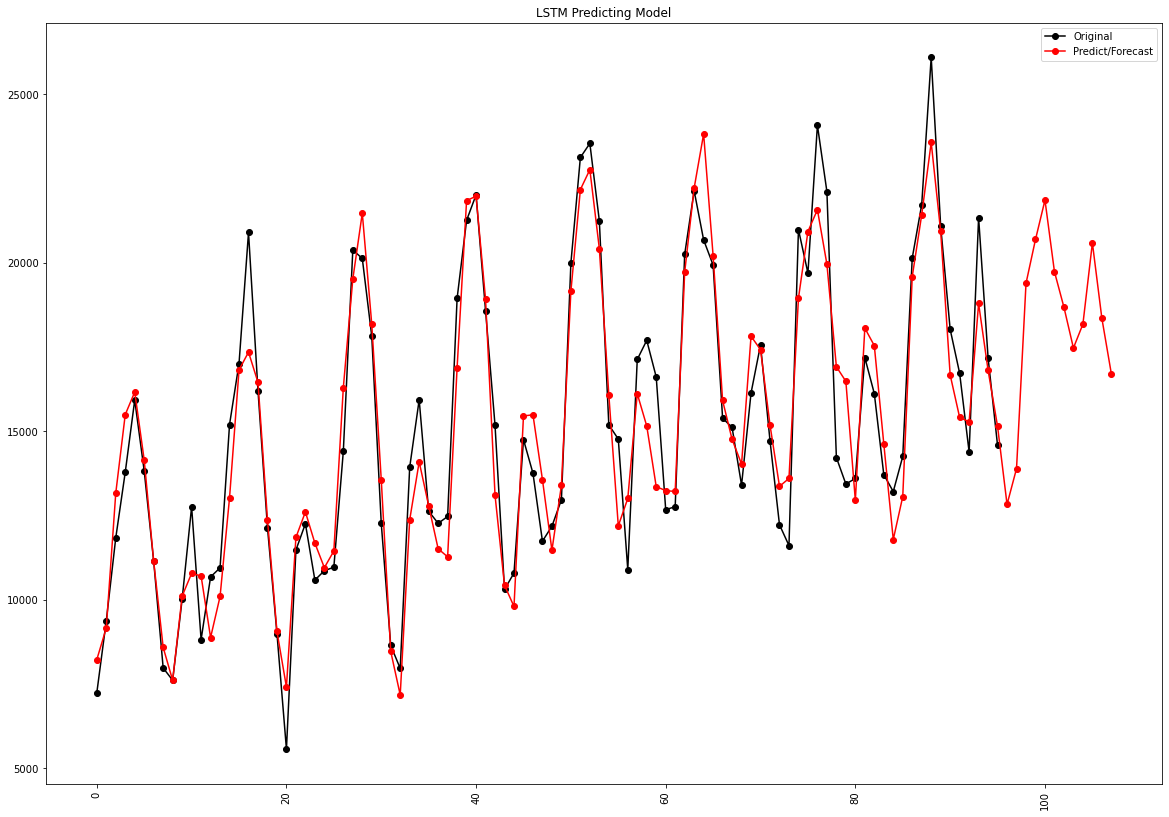

In [265]:
from matplotlib import collections  as mc

plt.figure(figsize=(20, 14))

x, = plt.plot(fc_output[:len(fc_output)-12], marker='o', color='black')

y, = plt.plot(fc_forecast[:,0],marker='o',color='red')
    
plt.xticks(rotation = 'vertical')

plt.legend([x,y],['Original','Predict/Forecast'])

plt.title("LSTM Predicting Model")

plt.show()